# 데이터 가져오기

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
data = pd.read_csv('../../data/train.csv')

# 데이터 구조 분석

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [5]:
data.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [6]:
data.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [7]:
data['day_of_week'].value_counts()

금    684024
수    675583
목    674070
일    673632
토    669767
화    662498
월    661643
Name: day_of_week, dtype: int64

In [8]:
print(data['road_name'].value_counts())
print('feature \'road_name\' length : {}'.format(len(data['road_name'].value_counts())))

일반국도12호선     1046092
-             569463
일반국도16호선      554510
일반국도95호선      248181
일반국도11호선      215701
지방도1132호선     179200
중산간서로         136629
태평로           129117
지방도1112호선     108777
지방도97호선       106113
번영로            94125
지방도1118호선      84964
일반국도99호선       82999
동홍로            78188
지방도1120호선      78012
새서귀로           77942
경찰로            77889
지방도1115호선      70282
연삼로            60208
중문로            57540
중앙로            54192
권학로            40341
지방도1119호선      40081
시청로            34199
산서로            33001
시민광장로          32320
중정로            30509
서사로            23242
관광단지로          23116
첨단로            16684
연북로            12093
애조로            12092
연북2교           12085
제2거로교          12070
연동로            12056
동부관광도로         12045
한천로            11973
관덕로            11962
고평교            11950
신대로            11944
지방도1136호선      11913
어시천교           11835
외도천교           11835
삼성로            11727
신산로            11672
관광단지1로         10706
지방도1116호선      10685
일주동로         

In [9]:
print(data['start_node_name'].value_counts().head(30))
print('feature \'start_node_name\' length : {}'.format(len(data['start_node_name'].value_counts())))

고성교차로      42169
산신주유소      29386
미수2교       26635
영주교        24381
봉개교 시종점    24290
해안교        24182
제2거로교      24140
동홍교        23628
도순교        23489
제6산록교      23425
제5산록교      23425
정방수퍼       23291
자운당교       22818
중앙교        22723
중문농협       22686
구엄교        22120
천제이교       21636
제4교래교      21618
제6광령교      21486
제2고성교      21484
제3고성교      21484
상창육교       21373
대원교        21305
제2성읍교      21190
한국통신       21149
제1성읍교      21128
윤고교        20943
대천동사거리     20775
진은교        20282
제2가시교      20062
Name: start_node_name, dtype: int64
feature 'start_node_name' length : 487


In [10]:
print(data['end_node_name'].value_counts().head(30))
print('feature \'end_node_name\' length : {}'.format(len(data['end_node_name'].value_counts())))

고성교차로      42265
산신주유소      29202
구엄교        27510
미수2교       26621
영주교        24370
봉개교 시종점    24292
해안교        24169
제2거로교      24141
동홍교        23622
도순교        23490
제6산록교      23425
제5산록교      23425
정방수퍼       23126
중앙교        22722
자운당교       22692
중문농협       22283
천제이교       21649
제4교래교      21615
제6광령교      21486
제2고성교      21484
제3고성교      21484
상창육교       21373
대원교        21300
제2성읍교      21298
제1성읍교      21120
윤고교        20950
한국통신       20889
대천동사거리     20791
진은교        20282
제2가시교      20048
Name: end_node_name, dtype: int64
feature 'end_node_name' length : 487


In [11]:
data['start_turn_restricted'].value_counts()

없음    4239701
있음     461516
Name: start_turn_restricted, dtype: int64

In [12]:
data['end_turn_restricted'].value_counts()

없음    4239599
있음     461618
Name: end_turn_restricted, dtype: int64

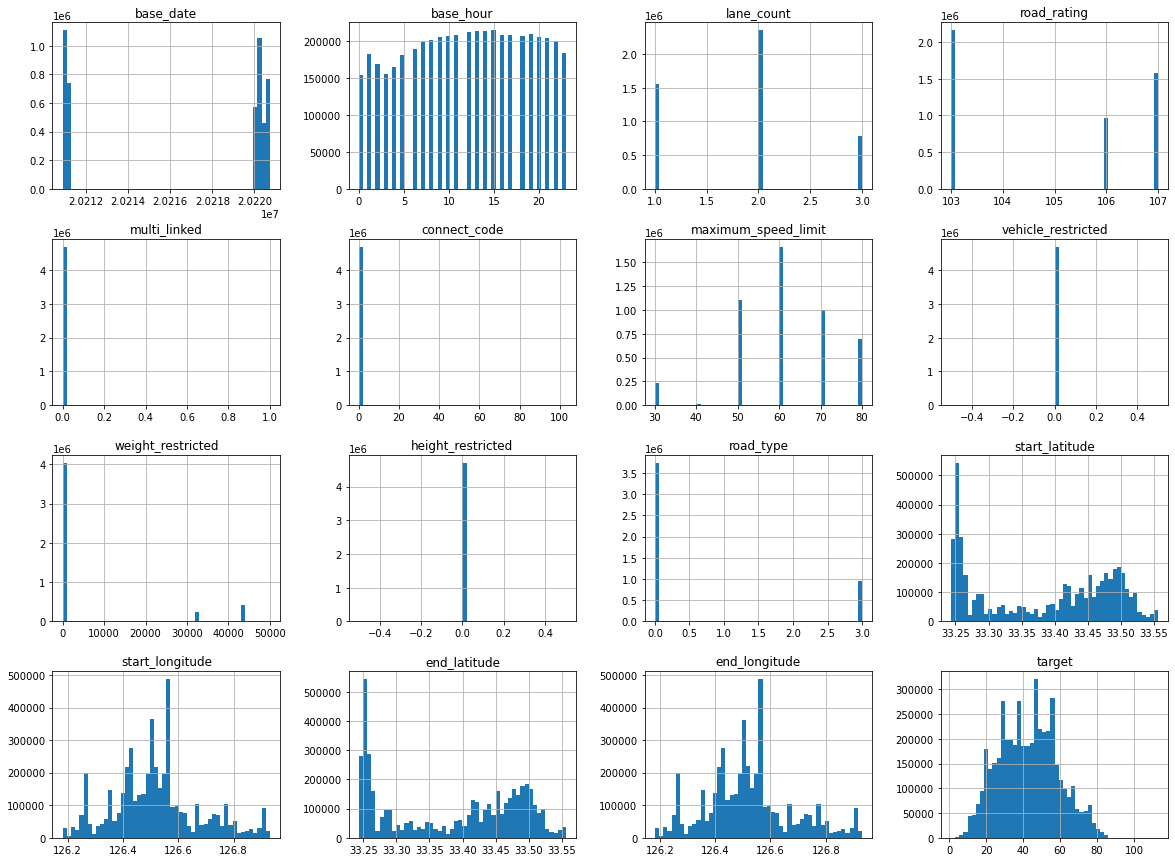

In [13]:
%matplotlib inline
data.hist(bins=50, figsize=(20, 15))
plt.show()
plt.close()

# Data Specification

- 4,701,217 entries
- 23 columns
<br> <br/>
- float64(9)
    * maximum_speed_limit : [30, 40, 50, 60, 70, 80] 6가지 값 가짐(사실상 categorical feature)
    * vehicle_restricted : 모든 값 0
    * weight_restricted : 대부분 값이 0이고, 나머지 값은 [32400, 43200, 50000] (사실상 categorical feature)
    * height_restricted : 모든 값 0
    * start_latitude
    * start_longitude
    * end_latitude
    * end_longitude
    * target
<br> <br/>
- int64(7)
    * base_hour : 00 ~ 23시 모든 시간대 분포 비슷
    * base_date : 연도, 날짜 정보(샘플별로 sequence 하진 않음)
    * lane_count : 1, 2, 3 차선(사실상 categorical feature)
    * road_rating : 도로 등급은 101 ~ 107까지 7개 분류지만 [103, 106, 107] 세 가지 값만 가짐(사실상 categorical feature)
    * multi_linked : 거의 모든 값이 0, 극히 일부 1
    * connect_code : 거의 모든 값이 0, 극히 일부 103
    * road_type : 도로 유형은 000 ~ 004까지 5가지 분류지만 [0, 3] 두 값만 가짐(사실상 categorical feature)
<br> <br/>
- object(7)
    * id
    * day_of_week : 월 ~ 일, 각 요일마다 샘플 비율 비슷
    * road_name : 61가지 도로명 존재
    * start_node_name : 487가지 시작지점 존재
    * end_node_name : 487가지 종료지점 존재
    * start_turn_restricted : 있음, 없음 두 값 가짐(1:10 비율)
    * end_turn_restricted : 있음, 없음 두 값 가짐(1:10 비율)

 # 데이터 나누기

In [14]:
import numpy as np

In [15]:
np.random.seed(42)

In [16]:
group = ['lane_count', 'road_rating', 'road_type', 'road_name', 'start_turn_restricted', 
         'end_turn_restricted', 'weight_restricted', 'maximum_speed_limit', 'multi_linked', 'connect_code']

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, val_index in split.split(data, data[group]):
    train_set = data.loc[train_index]
    val_set = data.loc[val_index]

In [18]:
len(train_set) / len(data)

0.7999998723734727

In [19]:
len(val_set) / len(data)

0.20000012762652736

In [20]:
data['weight_restricted'].value_counts() / len(data)

0.0        0.857836
43200.0    0.087288
32400.0    0.050903
50000.0    0.003973
Name: weight_restricted, dtype: float64

In [21]:
train_set['weight_restricted'].value_counts() / len(train_set)

0.0        0.857836
43200.0    0.087288
32400.0    0.050903
50000.0    0.003973
Name: weight_restricted, dtype: float64

In [22]:
val_set['weight_restricted'].value_counts() / len(val_set)

0.0        0.857837
43200.0    0.087288
32400.0    0.050903
50000.0    0.003972
Name: weight_restricted, dtype: float64

# 데이터 탐색 및 시각화

<AxesSubplot:xlabel='start_longitude', ylabel='start_latitude'>

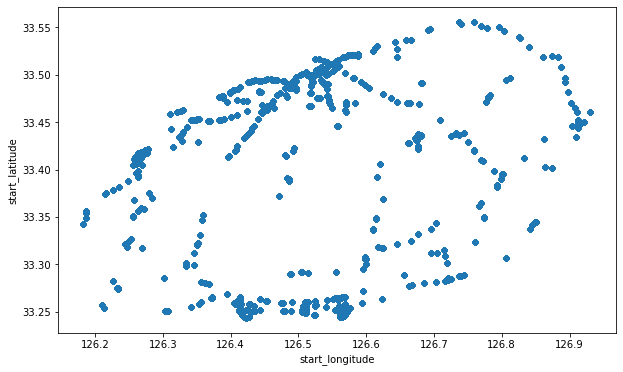

In [23]:
train_set.plot(kind='scatter', x='start_longitude', y='start_latitude', alpha=0.1, figsize=(10, 6))

<AxesSubplot:xlabel='start_longitude', ylabel='start_latitude'>

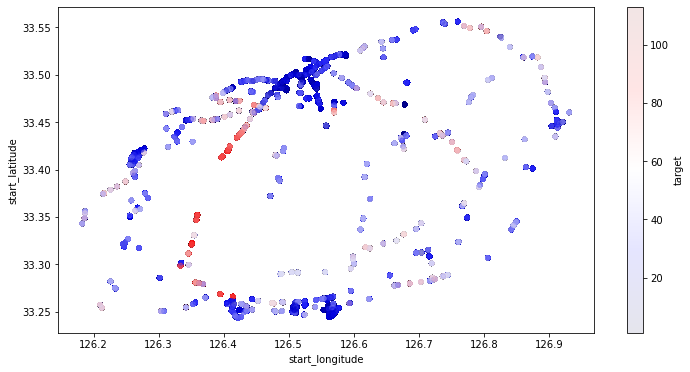

In [24]:
train_set.plot(kind='scatter', x='start_longitude', y='start_latitude', alpha=0.1, figsize=(12, 6),
              c='target', cmap=plt.get_cmap('seismic'), colorbar=True, sharex=False)

In [25]:
plt.rcParams["font.family"] = "NanumGothic"

- Point
1. `axes.flat`
2. `df.plot(ax=ax)` \
`sns.scatterplot(ax=ax)`
3. `plt.title()` -> `ax.set_title()`
4. `fig.tight_layout()`

28it [00:11,  2.37it/s]


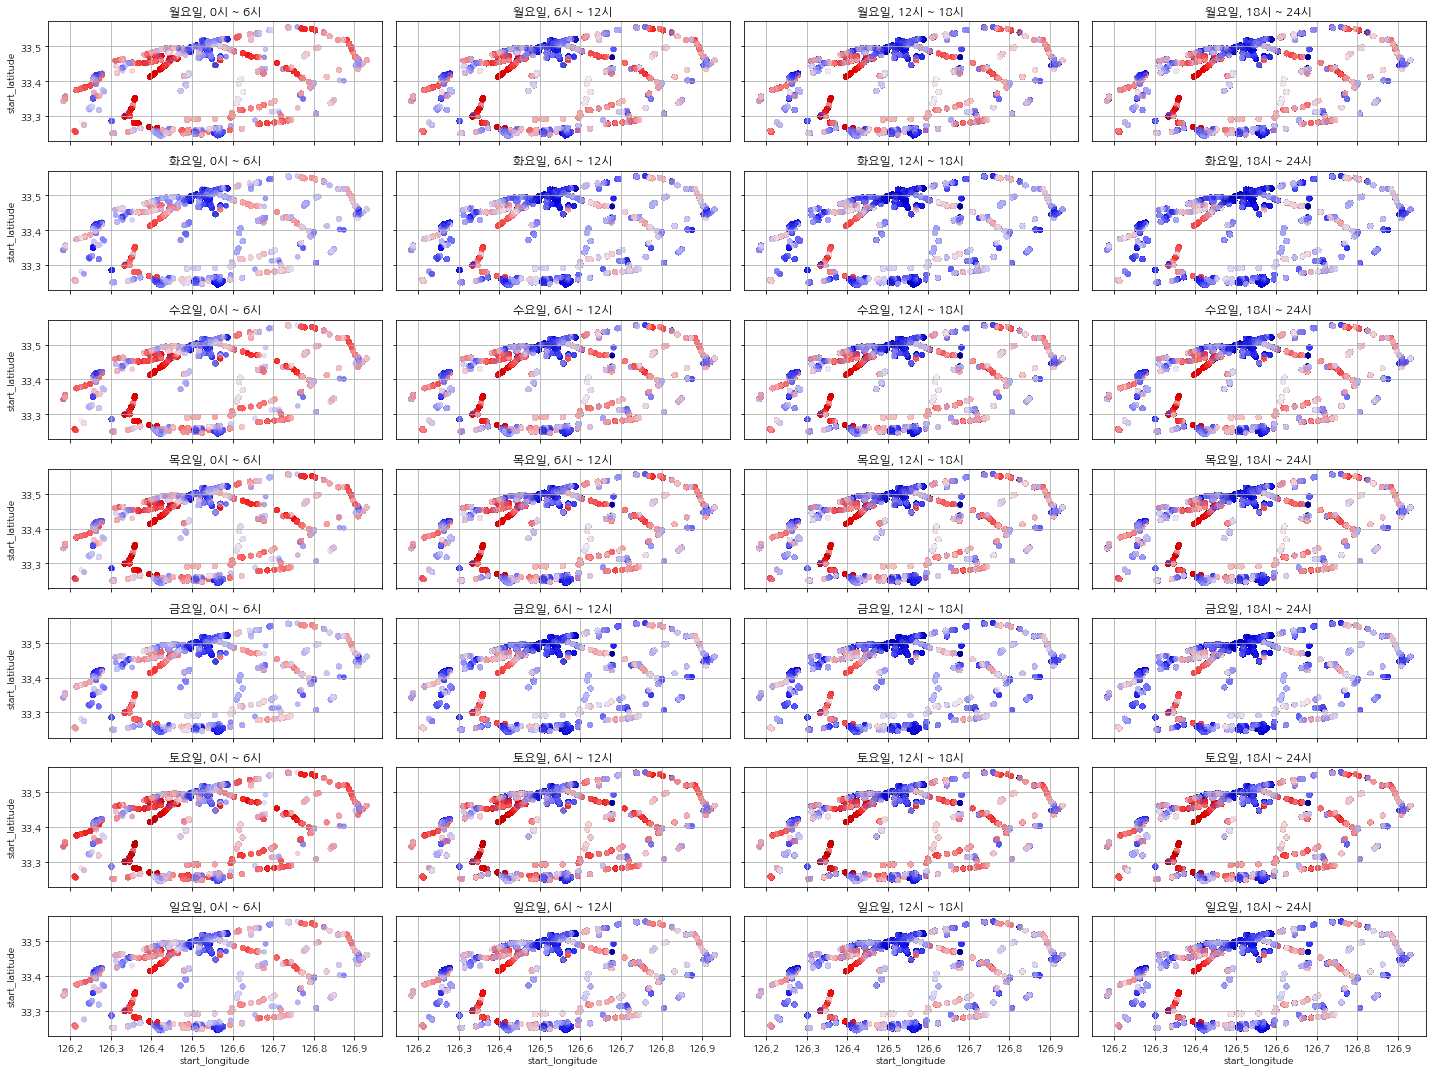

CPU times: user 1min 29s, sys: 7.09 s, total: 1min 36s
Wall time: 1min 28s


In [26]:
%%time

from tqdm import tqdm
from itertools import product

n_rows, n_cols = 7, 4  # 7일, day quarter
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
for ax, (week, hour) in tqdm(zip(axes.flat, product('월화수목금토일', [6, 12, 18, 24]))):
    train_set.loc[(train_set['base_hour'] < hour) & (train_set['day_of_week'] == week)].plot(kind='scatter', 
                                                                                             x='start_longitude', 
                                                                                             y='start_latitude',
                                                                                             alpha=0.1,  
                                                                                             c='target', 
                                                                                             cmap='seismic', 
                                                                                             colorbar=False,
                                                                                             ax=ax)
    ax.set_title('{}요일, {}시 ~ {}시'.format(week, hour - 6, hour))
    if hour != 6:
        ax.set_yticklabels([]), ax.set_ylabel(None)
    if week != '일':
        ax.set_xticklabels([]), ax.set_xlabel(None)
    ax.grid()
fig.tight_layout()
plt.show()

<AxesSubplot:>

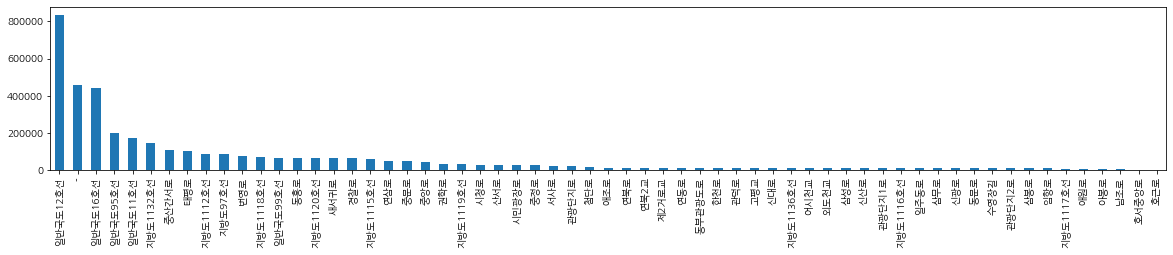

In [27]:
train_set['road_name'].value_counts().plot.bar(x='road_name', figsize=(20, 3))

In [28]:
train_copy = train_set.copy()

train_copy['base_date'] = pd.to_datetime(train_copy['base_date'],format='%Y%m%d')
train_copy['year']= train_copy['base_date'].dt.year
train_copy['month']= train_copy['base_date'].dt.month
train_copy['day']= train_copy['base_date'].dt.day

date = train_copy[['base_date', 'target']].groupby('base_date').mean().reset_index()
hour = train_copy[['base_hour', 'target']].groupby('base_hour').mean().reset_index()
week = train_copy[['day_of_week', 'target']].groupby('day_of_week').mean().reset_index()
road = train_copy[['road_name', 'target']].groupby('road_name').mean().reset_index()
year = train_copy[['year', 'target']].groupby('year').mean().reset_index()
month = train_copy[['month', 'target']].groupby('month').mean().reset_index()
day = train_copy[['day', 'target']].groupby('day').mean().reset_index()


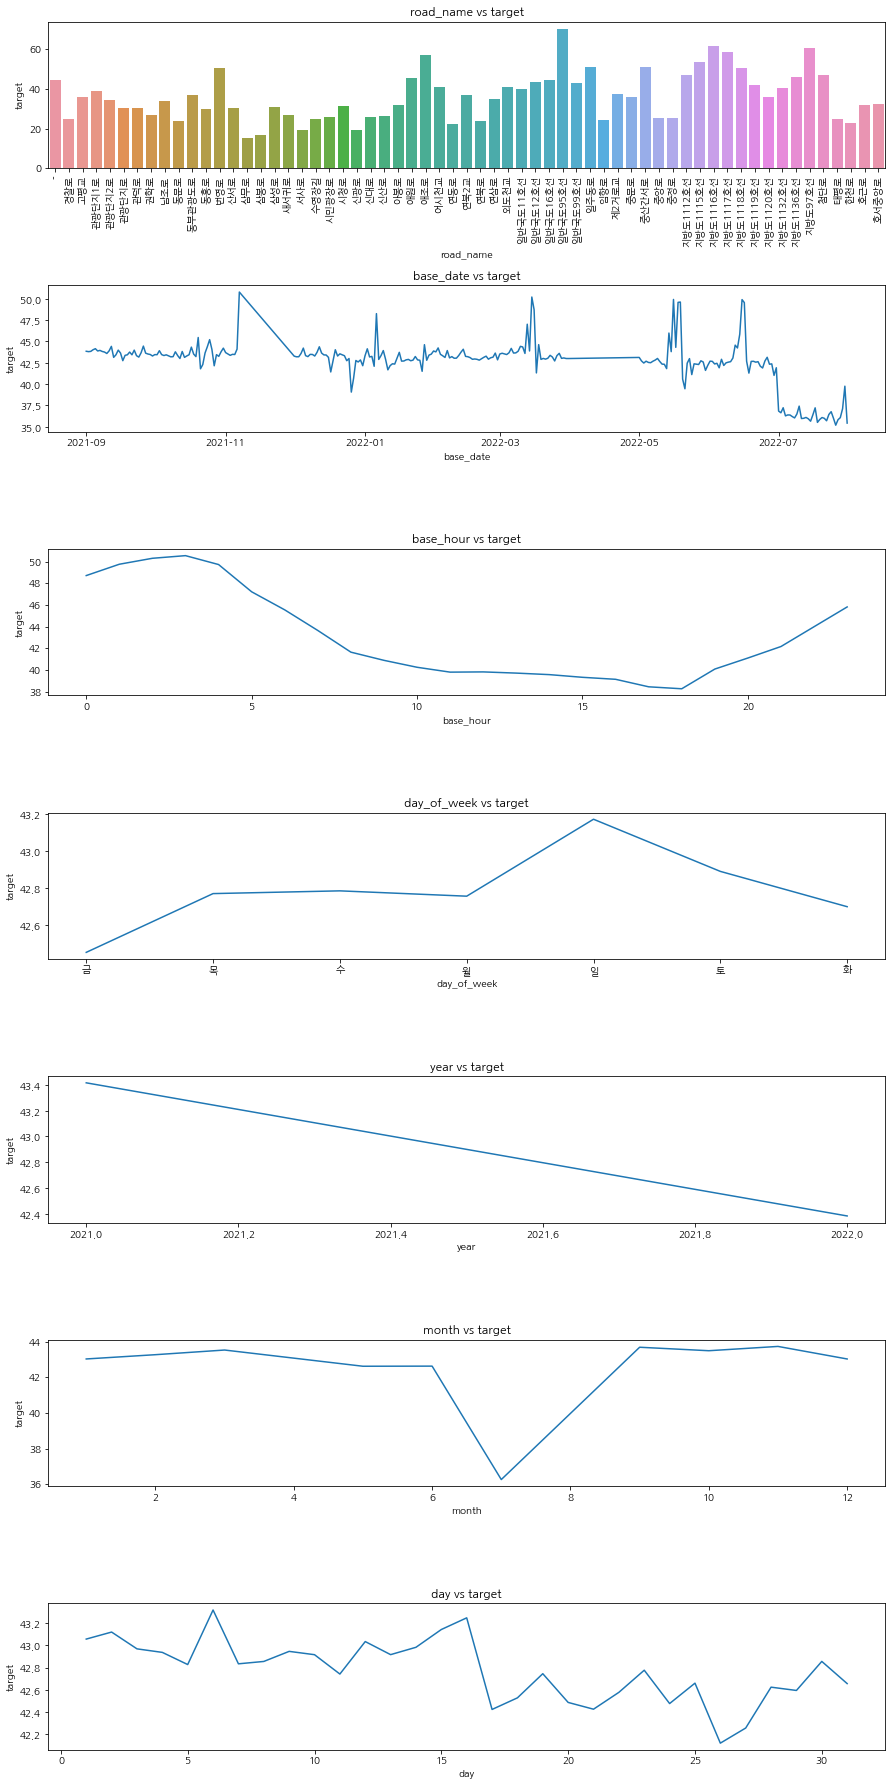

In [29]:
import seaborn as sns

fig, axes = plt.subplots(7, figsize=(15,30))


sns.barplot(x='road_name', y='target', data=road, ax=axes[0]).set(title='road_name vs target')
sns.lineplot(x='base_date', y='target', data=date, ax=axes[1]).set(title='base_date vs target')
sns.lineplot(x='base_hour', y='target', data=hour, ax=axes[2]).set(title='base_hour vs target')
sns.lineplot(x='day_of_week', y='target', data=week, ax=axes[3]).set(title='day_of_week vs target')
sns.lineplot(x='year', y='target', data=year, ax=axes[4]).set(title='year vs target')
sns.lineplot(x='month', y='target', data=month, ax=axes[5]).set(title='month vs target')
sns.lineplot(x='day', y='target', data=day, ax=axes[6]).set(title='day vs target')


axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
# fig.tight_layout()
plt.show()

In [30]:
corr_matrix = train_set.corr()

corr_matrix['target'].sort_values(ascending=False)

target                 1.000000
maximum_speed_limit    0.425533
weight_restricted      0.294130
road_type              0.200845
connect_code           0.048396
start_latitude         0.036348
end_latitude           0.036213
end_longitude         -0.000939
start_longitude       -0.001101
multi_linked          -0.008479
base_date             -0.033951
lane_count            -0.144254
base_hour             -0.159547
road_rating           -0.261740
vehicle_restricted          NaN
height_restricted           NaN
Name: target, dtype: float64

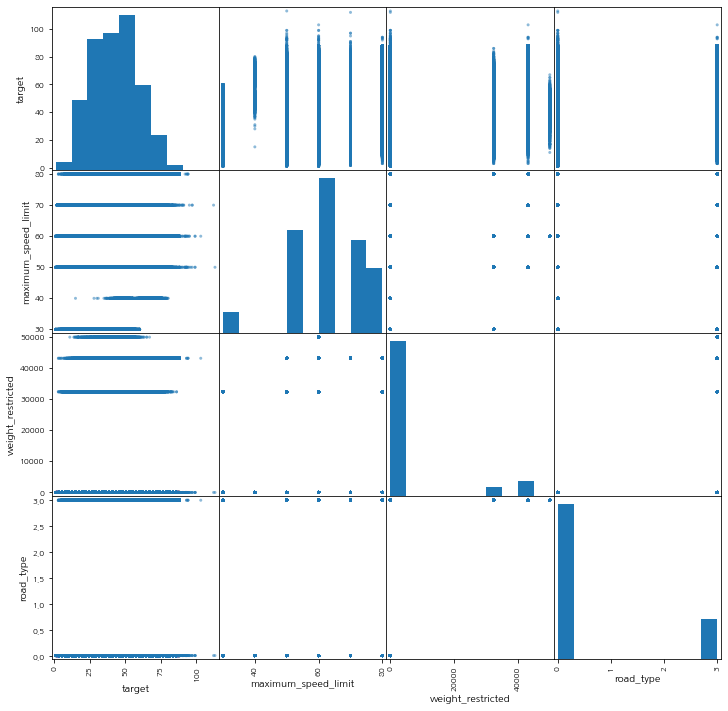

In [31]:
from pandas.plotting import scatter_matrix

attributes = ['target', 'maximum_speed_limit', 'weight_restricted', 'road_type']

scatter_matrix(train_set[attributes], figsize=(12, 12))
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder

items =  ['day_of_week', 'road_name', 'start_node_name', 'start_turn_restricted', 'end_node_name', 'end_turn_restricted']
train_copy = train_set.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    train_copy[i] = encoder.fit_transform(train_copy[i])

train_copy.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
2498625,TRAIN_2498625,20211031,4,15,2,107,0,0,0,80.0,0.0,43200.0,0.0,3,382,33.287356,126.736525,0,382,33.287582,126.737512,0,57.0
748061,TRAIN_0748061,20220110,3,22,3,107,6,0,0,60.0,0.0,0.0,0.0,0,160,33.514205,126.538406,0,26,33.513333,126.542349,0,36.0
143877,TRAIN_0143877,20220520,0,12,3,106,12,0,0,70.0,0.0,0.0,0.0,0,77,33.491848,126.591872,1,145,33.496711,126.581529,0,46.0
4190748,TRAIN_4190748,20210918,5,11,2,103,36,0,0,60.0,0.0,0.0,0.0,0,206,33.264112,126.554043,0,207,33.263685,126.550978,0,27.0
1260620,TRAIN_1260620,20211106,5,9,1,103,36,0,0,60.0,0.0,0.0,0.0,0,218,33.381730,126.792312,0,221,33.383600,126.793649,0,39.0


/root/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


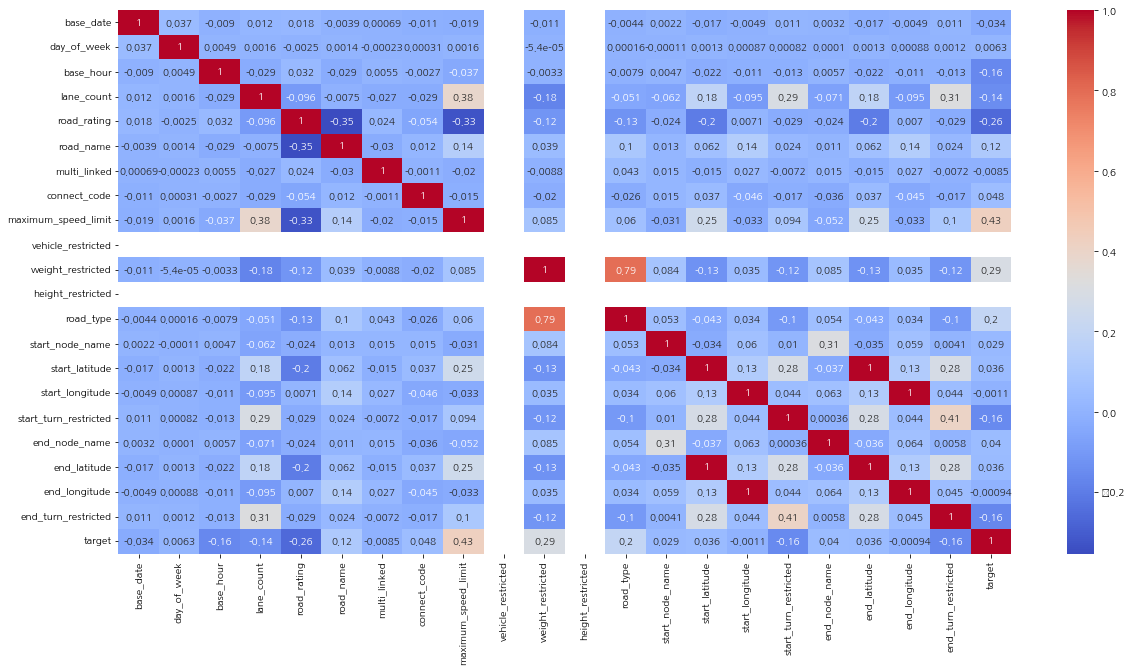

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(train_copy.corr(),annot=True, cmap='coolwarm')
plt.show()

# 데이터 전처리

    - 모든 값이 0인 feature들 제거(selection)
    - categorical feature encoding
    - road_name에 - 값으로 채워진 데이터 제거(또는 imputing)
    - feature extraction
    - feature scaling

In [34]:
data = pd.read_csv('../../data/train.csv')

### Drop feature

In [35]:
drop_list = ['id', 'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 
             'start_node_name', 'end_node_name', 'height_restricted', 'vehicle_restricted', 'day_of_week']

data.drop(drop_list, axis=1, inplace=True)

### Missing value

In [36]:
len(data.loc[data['road_name'] == '-'])

569463

In [37]:
data.drop(data.loc[data['road_name'] == '-'].index, inplace=True)

In [38]:
len(data.loc[data['road_name'] == '-'])

0

### Make time index

In [39]:
data['date'] = data['base_date'].astype(str) + " " + data['base_hour'].astype(str) + ":00"

In [40]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d %H:%M')

In [41]:
data[['base_date', 'base_hour', 'date']].head()

,base_date,base_hour,date
0,20220623,17,2022-06-23 17:00:00
1,20220728,21,2022-07-28 21:00:00
2,20211010,7,2021-10-10 07:00:00
3,20220311,13,2022-03-11 13:00:00
4,20211005,8,2021-10-05 08:00:00


In [42]:
data.drop(['base_date', 'base_hour'], axis=1, inplace=True)

In [43]:
data.head()

,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_turn_restricted,end_turn_restricted,target,date
0,1,106,지방도1112호선,0,0,60.0,32400.0,3,없음,없음,52.0,2022-06-23 17:00:00
1,2,103,일반국도11호선,0,0,60.0,0.0,0,있음,없음,30.0,2022-07-28 21:00:00
2,2,103,일반국도16호선,0,0,80.0,0.0,0,없음,없음,61.0,2021-10-10 07:00:00
3,2,107,태평로,0,0,50.0,0.0,0,없음,없음,20.0,2022-03-11 13:00:00
4,2,103,일반국도12호선,0,0,80.0,0.0,0,없음,없음,38.0,2021-10-05 08:00:00


# 모델 선택 & 학습